In [62]:
import sys
sys.path.append('./privatizers')
sys.path.append('./dataProviders')
sys.path.append('./adapters')

from privatizers import laplacePrivatizer

class Person:
    def __init__(self, idNumber, height):
        self.id = idNumber
        self.height = height
    

def myFunc(p):
  return p.height


In [63]:
def run_single_test(epsilon = 1.0):
    initialHeight = 140
    allPeople = []
    for i in range(100):
        newPerson = Person(i, i+initialHeight)
        allPeople.append(newPerson)

    sensitivity = 100
    privatizer = laplacePrivatizer.LaplacePrivatizer(epsilon)

    privatizedPeople = []
    for person in allPeople:
        privatizedHeight = privatizer.privatizeSingleAnswer(person.height)
        privatizedPerson = Person(person.id, privatizedHeight)
        privatizedPeople.append(privatizedPerson)

    privatizedPeople.sort(key=myFunc)

    accuracy = 0
    iterator = 0
    for p in privatizedPeople:
        accuracy += 1 if (p.id == iterator) else 0
        iterator += 1

    accuracy /= len(privatizedPeople)
    return accuracy

In [64]:
x = run_single_test()
print(x)

0.43


In [65]:
import math

def epsilonFromD(d):
    return math.log((1+d)/(1-d))

In [85]:
def getAverageResult(d):
#     d = 0.5
    epsilon = epsilonFromD(d)

    testResults = []
    for i in range(1000):
        testResults.append(run_single_test(epsilon))

    avg = sum(testResults) / len(testResults)
#     print(avg)
    return avg

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  after removing the cwd from sys.path.


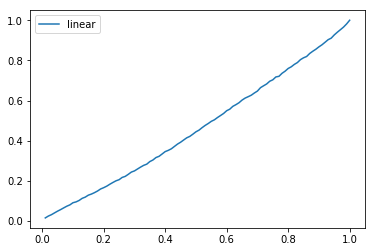

In [89]:
import matplotlib.pyplot as plt
import numpy as np

# Prepare the data
x = np.linspace(0.01, 1.0, 100)
y = []

for v in x:
    y.append(getAverageResult(v))

# Plot the data
plt.plot(x, y, label='linear')

# Add a legend
plt.legend()

# Show the plot
plt.show()